### Analysis of the Numpy.Random Package

Foreword


### Q1. Explain the overall purpose of the package.

**NumPy** is the fundamental package for scientific computing with Python. [Numpy.Random](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) uses the [Mersenne twister sequence](https://en.wikipedia.org/wiki/Mersenne_Twister) to generate random numbers in a deterministic fashion, i.e they are not entirely random but 'pseudo' random.  For this reason the  Numpy.Random package is unsuitable for critical security or serious cryptgraphic work, but is very useful for generating random numbers in a contolled or experimental environment.  There is also a need to 'seed' the random value due to the inherent pseudo-randomness as sequences of the same random numbers can reoccur<sup>[ref](https://en.wikipedia.org/wiki/Pseudorandom_generator)</sup>.

### Q2. Explain the use of the “Simple random data” and “Permutations” functions.

**Simple random data** is a sample of data (i.e a subset) chosen from a larger sample (aka a population). Each element is chosen randomly and entirely by chance, such that each element/individual has the same probability of being chosen at any stage during the sampling process. Each subset of elements has the same probability of being chosen for the sample as any other subset of elements. see [Ref](https://en.wikipedia.org/wiki/Simple_random_sample).<br>


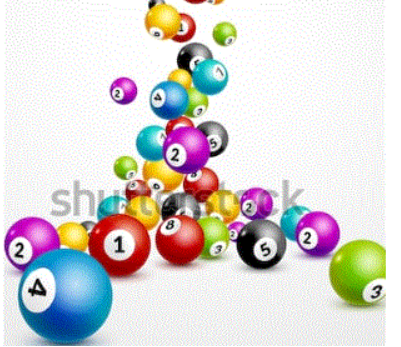

![](http://localhost:8888/view/Assign_Repository/Images%20folder/lottery-glass-bowl-vector.jpg)

**Permutation functions** are functions that essentially arrange/rearrange all the elements of a set in some order and can produce a number of different subsets with varying sequences or combinations of elements.  Re-ordering a set is referred to as permuting.  In the graphic below<sup>[ref](https://en.wikipedia.org/wiki/Permutation)</sup>, we have 6 rows with 3 difference coloured ball sequences and therefore the 6 rows have all different permutations.

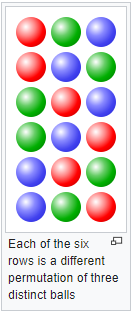

### Q3. Explain the use and purpose of at least five “Distributions” functions.

First let's define the term **'Distribution'**, also referred to as a **Probability Distribution**. In statistics the distribution of a statistical set of data is a listing of all the possible values of data and how often they occur<sup>([Ref](https://www.dummies.com/education/math/statistics/what-the-distribution-tells-you-about-a-statistical-data-set/))</sup>.  There are dozens of probability distributions and we will attempt to examine some of the more useful one below.  Interestingly, despite the range of distributions and there size, probabilities in a distribution always add up to 1.<sup>([Ref](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/))
    
Probability distributions broadly fall into one of two categories, they either have *'discrete'* or *'continuous'* random variables.  A discrete random variable has a distinct value.  A simple example is the throwing of a dice, where the probability of getting each value is equal in the range 1 -6, so each outcome has a 1/6<sup>th</sup> probability of occurance.  We can sum the probabilities to calculate the probility of an event such as the chance of rolling an even number ;

If we assign the letter 'p' to probability, the p(2) + p(4) + p(6) = 1/6 + 1/6 + 1/6 = 3/6 = 1/2.

A continuous random variable in contrast has infinite possible values as the values are taken from a 'continuum'.  Therefore the probability of an exact or discrete variable is zero.  For example, measuring the height of a person.  The real measurement is never ascertained as we are limited by the accuracy of the measuring apparatus, we therefore ultimately measure to a 'best guess' or an approximation of the value. Also a person's height varies throughout the day so it's a question of when they are measured and to what degree of accuracy we are satisfied.


![Distribution Relationships](https://www.dropbox.com/s/m66msgcsqn1fh5s/Distribution%20Relationships.gif?dl=0)

To illustrate probability distributions we use the 'probability density function' (PDF).  The PDF specifies the probability of a random variable falling within a particular range of values.  The probability is given by the 'integral' of the variable's PDF over the range.  In other words the area under the density function above the horizontal axis between it's starting and ending range values.  The PDF is always non-negative and its integral over the entire spread is equal to one.<sup>([Ref](https://en.wikipedia.org/wiki/Probability_density_function))

Now what does a **'Distribution Function'** do?  A Distribution Function is a mathematical expression that describes the probability that a system will take on a specific value or set of values.([Ref](https://www.britannica.com/science/distribution-function))A distribution function may take into account as many variables as one chooses to include.

Let's look at some distribution functions and then see how they generate their outcome and provide us with a probability distribution.  We will start with the basic 'random' function.

In [1]:
import numpy as np
np.random.rand()

0.23780591342022706

We see that rand() returns a random number between 0 & 1, without 'shape' and without a 'distribution'.
According to the reference material [numpy.random.rand](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html#numpy.random.rand), the rand function returns an array of numbers with a given shape from a uniform distribution between 0 & 1, the square bracket indicating that zero is inlcuded, and the round bracket indicating that one is not included [0,1)

In [2]:
#Shape refers to the dimensions of the array
#Uniform distribution refers to ........
#Let's insert some integers to see what 'shape' we can put on the array 
np.random.rand(4,7)

array([[0.67187281, 0.86120933, 0.9278622 , 0.31221051, 0.21142273,
        0.26970652, 0.44005356],
       [0.43714001, 0.56896133, 0.68099341, 0.02028433, 0.48235085,
        0.75184617, 0.48173601],
       [0.14607339, 0.7876751 , 0.66529782, 0.7100434 , 0.31579862,
        0.66798154, 0.96795652],
       [0.91920423, 0.9873681 , 0.89953297, 0.26883908, 0.16533839,
        0.99272441, 0.19032909]])

From our example above we see that the integer values (4,7) returns 4 arrays inside a single array, each single array containing 7 numbers between 0 & 1.  These 'numbers' are floating numbers.  We test for randomness by re-running the the function again and again.

In [3]:
np.random.rand(4,7)

array([[0.39719726, 0.38674315, 0.63366526, 0.30128852, 0.9874931 ,
        0.74052447, 0.27321661],
       [0.23196311, 0.92827988, 0.2206438 , 0.88184936, 0.61586638,
        0.54311929, 0.35690026],
       [0.96118083, 0.49964016, 0.95185051, 0.01021147, 0.57034839,
        0.7843277 , 0.29554332],
       [0.47457909, 0.79933094, 0.60061998, 0.08968881, 0.94501883,
        0.12497203, 0.34888901]])

Returning to the reference term **'uniform distribution'** - we will look at its uniformity by plotting a distribution. First let's read a [definition](https://stattrek.com/statistics/dictionary.aspx?definition=uniform_distribution) as - *"in the context of probability distributions, uniform distribution refers to a probability distribution for which all of the values that a random variable can take on occur with equal probability"*.  **Ok, let's plot!** 

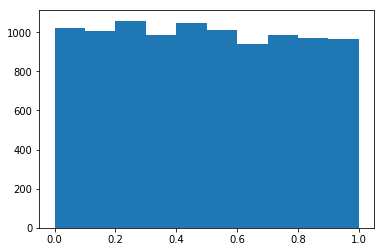

In [4]:
#Create a large array 'A' of random numbers with a uniform distribution
A = np.random.rand(10000)

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(A)
plt.show()

We observe from the plot that 10,000 numbers have been generated between 0 & 1, and these numbers have been placed into 10 bins (0.1, 0.2, 0.3....) for the purpose of plotting the histogram. We expect that if we re-run this code again and again, the histograms will look similar i.e. there is a **uniformity** to the distribution of numbers generated between 0 & 1.


However, the rand function appears to be limited to floating point numbers between 0 & 1.  To go outside of this limitation we will look at another function called [Uniform](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html#numpy.random.uniform).  We note from the definition of 'uniform' that we determine the *interval* or the range of values from which a distribution is extracted by assigning 'low' and 'high' values, from which the low value is included and the high value is excluded. **Let's have a look!**


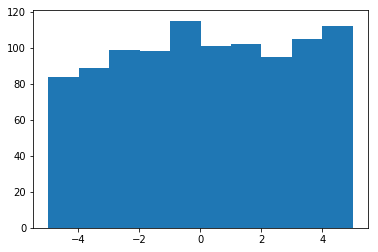

In [5]:
u = np.random.uniform(-5,5,1000)
plt.hist(u)
plt.show()

We now see that we can go beyond 0 & 1 with the *uniform* function to values including negative numbers. As before all of the values in the 'range' have an equal chance of occuring. The Probability Density Function is 1 and is expressed as follows;

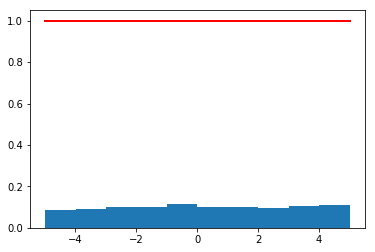

In [6]:
#Probability Density Function
count, bins, ignored = plt.hist(u, 10, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

We see from the plot above that there is an equal probability of a number occuring in each of the ten bins.  However we will need to look at the **normal** distribution to see a distribution of samples influenced by a large number of small but random disturbances - see reference [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html#numpy.random.normal).  A normal distribution (also know as the 'bell-shaped curve') is described by just two numbers, i.e. the mean and the standard devaiation.  The mean is the average and is where the bell curve peaks.  The Standard Deviation describes how wide or narrow the curve is.

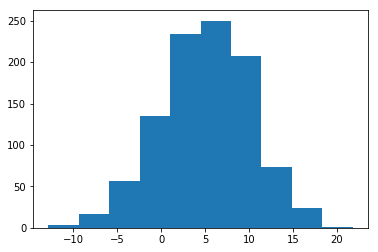

In [7]:
#To examine the normal distribution, we call the following function numpy.random.normal(loc=0.0, scale=1.0, size=None).
#'loc' refers to the centre of the distribution, 'scale' refers to the spread, and size is the output shape.
n = np.random.normal(5,5,1000)
plt.hist(n)
plt.show()


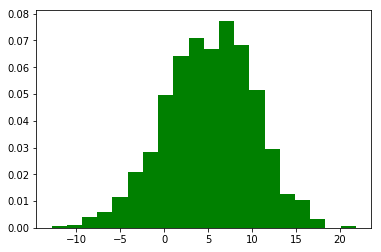

In [8]:
#Let's change some of the parameters of the histogram
plt.hist(n,20, density=True, facecolor='g',)
plt.show()

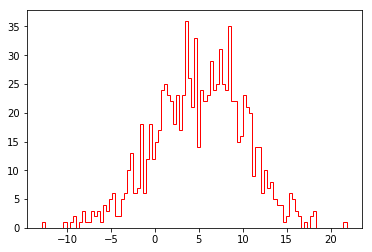

In [9]:
# using H=hist(my_data,bins=my_bin,histtype='step',color='r')
plt.hist(n,100,histtype='step', color='r')
plt.show()

Let's compare some functions.  Let's look at the **Bernoulli** and **Binomial** distribution functions.

The Bernoulli distribution represents the probability distribution of any single experiment that has a boolean outcome, i.e the answer is either 1 or 0 (or 'yes' or 'no'). The Bernoulli PDF has two lines of equal height, representing the two equally-probable outcomes of 0 and 1.

The bionomial distribution applies to any fixed number (n) of repetitions of an independent process that produces a certain outcome with the same probability (p) on each repetition. For example, it provides a formula for the probability of obtaining 10 sixes in 50 rolls of a die.([Ref](https://www.britannica.com/science/binomial-distribution)). See use of bionomial function below.

The Bernoulli distribution is a special case of the binomial distribution where a single trial is conducted (so n would be 1 for such a binomial distribution). It is also a special case of the two-point distribution, for which the possible outcomes need not be 0 and 1.([Ref](https://en.wikipedia.org/wiki/Bernoulli_distribution))

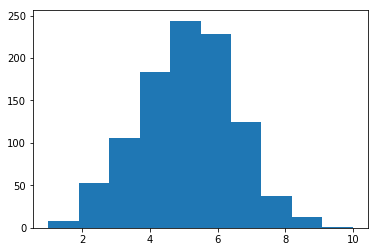

In [21]:
# To run a simple test of the Binomial function lets input the variable for flipping a coin then times.
# Each with an equal chance of either a head or a tail, run 1000 times. 

b = np.random.binomial(10,.5,1000)
plt.hist(b)
plt.show()

In [24]:
#Taking the example from above (the probability of obtaining 10 sixes in 50 rolls of a die) we input the variables as follows,
# n=50, probability of one 6, and no. of trials.

sum(np.random.binomial(50, 0.1667, 10000) == 10)/10000

0.1187

Now, let's go from Bionomial to **Hypergeometric**.

In bionomial distribution we sum the outcomes of Bernoulli distribution.  We are counting the number of successess where each outcome is independent of the previous result i.e. there is no change in any of the parameters.  
However, if we wanted to find out the probability of an event where the goalposts were moved as a result of previous events we would need to use the Hypergeometric function.



By way of a worked example, lets assume we have a bag of fruit with an equal no. of apples and oranges (of equal shape, size and texture!).  Blindfolded, we put our hand into the bag and draw out one piece of fruit and note which it is.  Let's assume that we want apples (success) instead of oranges (fail).  If we replaced the fruit and kept repeating the experiment then this would be classsed as a binomial distribution i.e the experiment has the same parameters each time it is run.

However, if we did not replace the item of fruit and continued to extract fruit from the bag, then the probability of success and failure changes.  This is represented by the hypergeometric distribution.  The change in the distributions (binomial vs hypergeometric) is really a function of the number of items in the bag as the larger the bag of fruit the less impact or dilution of the numbers and hence the probabilities would remain closer.

In [29]:
#Ok, let's use the hypergeometric function as follows;
# We have 100 pieces of fruit in a bag (50 apples & 50 oranges).
# If we take out 20 pieces of fruit, what is the likelyhood that 15 of them will be the same type?
#numpy.random.hypergeometric(ngood, nbad, nsample, size=None)
# ngood = 50, nbad = 50, nsample = 20, size = 10,000)

f = np.random.hypergeometric(50,50,20,10000)
sum(f>=15)/10000. + sum(f<=5)/10000

0.0204

In [ ]:
# The answer is 2% - so not very likely.



There are many distribution functions so let's look at some regular examples such as the **bionomial distribution**.

![Distribution Chocies Image](https://www.dropbox.com/s/7vd1tvx4rmwj42p/Distribution%20Choice.GIF?dl=0)

The bionomial distribution applies to any fixed number (n) of repetitions of an independent process that produces a certain outcome with the same probability (p) on each repetition. For example, it provides a formula for the probability of obtaining 10 sixes in 50 rolls of a die.9([Ref](https://www.britannica.com/science/binomial-distribution))

Running a bionomial experiment - four conditions are required to be satisifed,
(i) A fixed no of trials,
(ii) Each trial is independent of the others
(iii) There are only two outcomes
(iv) The probability of each outcome remains constant from trial to trial

### Q4. Explain the use of seeds in generating pseudorandom number

First let's take a look at a definition of a [pseudorandom number generator](https://en.wikipedia.org/wiki/Pseudorandom_number_generator). *A psuedornadom number generator is an algorithm for generating a sequence of numbers whose properties approximate the properties of sequences of random numbers. The PRNG-generated sequence is not truly random, because it is completely determined by an initial value, called the PRNG's seed (which may include truly random values). Although sequences that are closer to truly random can be generated using hardware random number generators, pseudorandom number generators are important in practice for their speed in number generation and their reproducibility.*

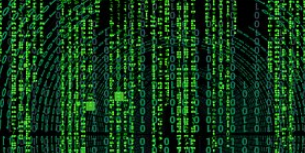

The seed is a number used as a starting point for the pseudorandom number generator.  The seed does not necessarily need to be random but once it is ignored in the calculation or the running of the algorithm, the values generated by the algorithm will follow a probability distribution in a pseudorandom manner.

A carfully engineered seed can be made to obscure the source and make it more difficult to predict values or develop a sequence of 'random' values.  For a seed to be used in a pseudorandom number generator, it does not need to be random. Because of the nature of number generating algorithms, so long as the original seed is ignored, the rest of the values that the algorithm generates will follow probability distribution in a pseudorandom manner.

In [ ]:
#Let's look at some code to see how we can replicate random numbers when we know the seed

#We choose a random value for the seed
np.random.seed(10015) ; np.random.rand(5)

In [ ]:
# Reset the seed to the same value as above and run again.
np.random.seed(100015) ; np.random.rand(5)

In [ ]:
# Now let's re-run this witout setting the seed!
np.random.seed() ; np.random.rand(5)

In [ ]:
np.random.seed() ; np.random.rand(5)

As we have not set the seed above, the computer has selected a starting position to run the random number generator.  When we call the function again we get a different output, due to the fact that the computer uses it's clock to set the seed.

The Binomial Probability Formula is 
P(r successes in n trials) = <sub>(n)</sub>C<sub>(r)</sub>.p<sup>(r)</sup>.q<sup>(n-r)</sup>

p = probability of sucess = getting 6
q = probability of failure = not getting 6
r = number of successes = 10
n = no. of experiments = 50

P(getting 6) = (n / r(n-r))(1/6)<sup>(10)</sup>(5/6)<sup>(40)</sup> = 

50 /10(50-10) = 50/400 = 0.125  ,  (1/6)<sup>(10)</sup>, =   1.65382E-08,         (5/6)<sup>(40)</sup> =   0.000680378

So, the mathematial answer to the questions is 1.40653E-12

In [ ]:
#plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')

In [ ]:
# Now let's have a look at some other distributions functions

In [ ]:
k = np.random.standard_normal(10)
k
plt.hist(k)
plt.show()


To generate random numbers from a normal distribution we use the normalvariate function (normalvariate(mu,sigma) where mu is the mean and sigma is the standard deviation.

In [ ]:
#By way of example let's generate 20 numbers from a bell curve with mean of zero and standard deviation of 1
import random
for i in range(20):
    print(random.normalvariate(0,1))
    plt.show()